In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 100)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
winner_list = []
classes = [[3,4,5],[2,3,4],[1,3,5]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1923
number of class2:2512

 ****** Running generation 0 ****** 

Population's average fitness: 0.52729 stdev: 0.07278
Best fitness: 0.72153 - size: (2, 7) - species 1 - id 173
Average adjusted fitness: 0.226
Mean genetic distance 2.902, standard deviation 0.440
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 12.303 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53717 stdev: 0.06220
Best fitness: 0.72153 - size: (2, 7) - species 2 - id 173
Average adjusted fitness: 0.111
Mean genetic distance 2.959, standard deviation 0.446
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 13.389 sec (12.846 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53870 stdev: 0.06443
Best fitness: 0.74408 - size: (3, 9) - species 3 - id 504
Average adjusted fitness: 0.233
Mean genetic distance 2.953, standard deviation 0.454
Population of 209 members in 41 species
Total extinct

Population's average fitness: 0.56065 stdev: 0.09016
Best fitness: 0.80947 - size: (5, 11) - species 22 - id 1893
Average adjusted fitness: 0.196
Mean genetic distance 3.069, standard deviation 0.557
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 16.464 sec (15.652 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.56191 stdev: 0.09105
Best fitness: 0.80947 - size: (5, 11) - species 22 - id 1893
Average adjusted fitness: 0.147
Mean genetic distance 3.058, standard deviation 0.558
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 16.603 sec (15.794 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.56430 stdev: 0.09358
Best fitness: 0.80947 - size: (5, 11) - species 22 - id 1893
Average adjusted fitness: 0.130
Mean genetic distance 3.129, standard deviation 0.541
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 16.911 sec (16.015 average)

 

Population's average fitness: 0.56578 stdev: 0.09662
Best fitness: 0.80947 - size: (5, 11) - species 22 - id 1893
Average adjusted fitness: 0.139
Mean genetic distance 3.152, standard deviation 0.554
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 25.963 sec (22.998 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.56461 stdev: 0.10527
Best fitness: 0.80947 - size: (5, 11) - species 22 - id 1893
Average adjusted fitness: 0.122
Mean genetic distance 3.146, standard deviation 0.552
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 22.772 sec (23.338 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.55889 stdev: 0.09703
Best fitness: 0.80947 - size: (5, 11) - species 22 - id 1893
Average adjusted fitness: 0.253
Mean genetic distance 3.163, standard deviation 0.545
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 21.722 sec (23.580 average)

 

Population's average fitness: 0.57931 stdev: 0.10869
Best fitness: 0.80992 - size: (12, 23) - species 14 - id 8845
Average adjusted fitness: 0.147
Mean genetic distance 3.265, standard deviation 0.578
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 21.270 sec (21.802 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.57593 stdev: 0.11463
Best fitness: 0.80992 - size: (12, 23) - species 14 - id 8845
Average adjusted fitness: 0.141
Mean genetic distance 3.239, standard deviation 0.601
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 21.731 sec (21.641 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.56628 stdev: 0.11014
Best fitness: 0.80992 - size: (12, 23) - species 14 - id 8845
Average adjusted fitness: 0.137
Mean genetic distance 3.277, standard deviation 0.589
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 22.242 sec (21.335 average)

Population's average fitness: 0.55555 stdev: 0.09299
Best fitness: 0.80992 - size: (12, 23) - species 14 - id 8845
Average adjusted fitness: 0.169
Mean genetic distance 3.153, standard deviation 0.579
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 25.116 sec (23.764 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.56642 stdev: 0.09270
Best fitness: 0.80992 - size: (12, 23) - species 14 - id 8845
Average adjusted fitness: 0.131
Mean genetic distance 3.158, standard deviation 0.583
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 24.911 sec (23.886 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.56532 stdev: 0.09408
Best fitness: 0.80992 - size: (12, 23) - species 14 - id 8845
Average adjusted fitness: 0.131
Mean genetic distance 3.158, standard deviation 0.582
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 23.346 sec (23.935 average)

Population's average fitness: 0.55522 stdev: 0.08430
Best fitness: 0.71229 - size: (3, 10) - species 16 - id 454
Average adjusted fitness: 0.140
Mean genetic distance 3.045, standard deviation 0.546
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 17.881 sec (17.123 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.55887 stdev: 0.07942
Best fitness: 0.71229 - size: (3, 10) - species 16 - id 454
Average adjusted fitness: 0.143
Mean genetic distance 2.995, standard deviation 0.560
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 20.756 sec (17.259 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.55717 stdev: 0.08506
Best fitness: 0.71229 - size: (3, 10) - species 16 - id 454
Average adjusted fitness: 0.141
Mean genetic distance 3.016, standard deviation 0.572
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 19.042 sec (17.681 average)

 ***


 ****** Running generation 44 ****** 

Population's average fitness: 0.56435 stdev: 0.08224
Best fitness: 0.71229 - size: (3, 10) - species 16 - id 454
Average adjusted fitness: 0.253
Mean genetic distance 3.101, standard deviation 0.561
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 18.200 sec (19.851 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.55440 stdev: 0.08639
Best fitness: 0.71229 - size: (3, 10) - species 16 - id 454
Average adjusted fitness: 0.220
Mean genetic distance 3.089, standard deviation 0.574
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 21.950 sec (20.142 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.56678 stdev: 0.08776
Best fitness: 0.71229 - size: (3, 10) - species 16 - id 454
Average adjusted fitness: 0.146
Mean genetic distance 3.083, standard deviation 0.588
Population of 197 members in 19 species
Total extinctions: 0
Generation

Total extinctions: 0
Generation time: 20.216 sec (21.724 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.55593 stdev: 0.08279
Best fitness: 0.79143 - size: (9, 22) - species 10 - id 10116
Average adjusted fitness: 0.139
Mean genetic distance 3.168, standard deviation 0.600
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 20.805 sec (21.453 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.55681 stdev: 0.08255
Best fitness: 0.79143 - size: (9, 22) - species 10 - id 10116
Average adjusted fitness: 0.140
Mean genetic distance 3.177, standard deviation 0.610
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 20.375 sec (21.353 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.55667 stdev: 0.08332
Best fitness: 0.79143 - size: (9, 22) - species 10 - id 10116
Average adjusted fitness: 0.142
Mean genetic distance 3.182, standard deviation 0.596

Mean genetic distance 3.209, standard deviation 0.625
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 32.601 sec (24.943 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.56190 stdev: 0.08137
Best fitness: 0.79143 - size: (9, 22) - species 10 - id 10116
Average adjusted fitness: 0.214
Mean genetic distance 3.229, standard deviation 0.616
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.685 sec (24.603 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.55586 stdev: 0.08491
Best fitness: 0.79143 - size: (9, 22) - species 10 - id 10116
Average adjusted fitness: 0.142
Mean genetic distance 3.237, standard deviation 0.610
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 22.876 sec (24.505 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.55654 stdev: 0.08500
Best fitness: 0.79143 - size: (9, 22) - species 10 - 

Population's average fitness: 0.57106 stdev: 0.09192
Best fitness: 0.75513 - size: (2, 7) - species 3 - id 56
Average adjusted fitness: 0.236
Mean genetic distance 2.984, standard deviation 0.535
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.944 sec (14.879 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.56790 stdev: 0.09124
Best fitness: 0.75513 - size: (2, 7) - species 3 - id 56
Average adjusted fitness: 0.321
Mean genetic distance 2.984, standard deviation 0.541
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 16.422 sec (15.148 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55915 stdev: 0.09707
Best fitness: 0.75513 - size: (2, 7) - species 3 - id 56
Average adjusted fitness: 0.240
Mean genetic distance 2.982, standard deviation 0.551
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 14.744 sec (15.229 average)

 ****** Runni

Population's average fitness: 0.54941 stdev: 0.09553
Best fitness: 0.75513 - size: (2, 7) - species 3 - id 56
Average adjusted fitness: 0.197
Mean genetic distance 2.855, standard deviation 0.618
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 17.543 sec (16.605 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.55044 stdev: 0.09057
Best fitness: 0.75513 - size: (2, 7) - species 3 - id 56
Average adjusted fitness: 0.203
Mean genetic distance 2.792, standard deviation 0.606
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 19.086 sec (16.825 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.56093 stdev: 0.08485
Best fitness: 0.75513 - size: (2, 7) - species 3 - id 56
Average adjusted fitness: 0.241
Mean genetic distance 2.778, standard deviation 0.649
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 16.182 sec (16.672 average)

 ****** Runnin

Population's average fitness: 0.55635 stdev: 0.08573
Best fitness: 0.75896 - size: (3, 9) - species 3 - id 6956
Average adjusted fitness: 0.185
Mean genetic distance 2.910, standard deviation 0.586
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 18.724 sec (20.102 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.55863 stdev: 0.08427
Best fitness: 0.75896 - size: (3, 9) - species 3 - id 6956
Average adjusted fitness: 0.212
Mean genetic distance 2.921, standard deviation 0.594
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 20.373 sec (20.333 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.55639 stdev: 0.09192
Best fitness: 0.75896 - size: (3, 9) - species 3 - id 6956
Average adjusted fitness: 0.205
Mean genetic distance 2.926, standard deviation 0.585
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 20.267 sec (20.248 average)

 ******

Population's average fitness: 0.55822 stdev: 0.08917
Best fitness: 0.75896 - size: (3, 9) - species 3 - id 6956
Average adjusted fitness: 0.226
Mean genetic distance 3.143, standard deviation 0.666
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 16.594 sec (16.789 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.54843 stdev: 0.09610
Best fitness: 0.75896 - size: (3, 9) - species 3 - id 6956
Average adjusted fitness: 0.217
Mean genetic distance 3.162, standard deviation 0.648
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 17.261 sec (16.714 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.55373 stdev: 0.09251
Best fitness: 0.75896 - size: (3, 9) - species 3 - id 6956
Average adjusted fitness: 0.213
Mean genetic distance 3.169, standard deviation 0.634
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 17.389 sec (16.754 average)

 ******

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [9]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [10]:
number_codes = [[0, 0, 0],
[0, 0, 1],
[0, 1, 0],
[1, 1, 1],
[1, 1, 0],
[1, 0, 1]]

In [11]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(3):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(3 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [12]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/2000

0.616

In [13]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:0 index:[2] real:2
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[2] real:3
#3 min_error:0 index:[2] real:3
#4 min_error:0 index:[0] real:3
#5 min_error:0 index:[2] real:3
#6 min_error:0 index:[2] real:3
#7 min_error:0 index:[0] real:3
#8 min_error:1 index:[0 4 5] real:3
#9 min_error:0 index:[5] real:3
#10 min_error:1 index:[0 4 5] real:3
#11 min_error:1 index:[0 4 5] real:3
#12 min_error:0 index:[5] real:3
#13 min_error:1 index:[0 4 5] real:3
#14 min_error:0 index:[2] real:2
#15 min_error:0 index:[2] real:2
#16 min_error:0 index:[2] real:2
#17 min_error:0 index:[2] real:2
#18 min_error:0 index:[2] real:2
#19 min_error:0 index:[2] real:2
#20 min_error:0 index:[2] real:2
#21 min_error:0 index:[2] real:2
#22 min_error:0 index:[2] real:2
#23 min_error:0 index:[2] real:2
#24 min_error:0 index:[2] real:2
#25 min_error:1 index:[1 2 3] real:2
#26 min_error:0 index:[2] real:2
#27 min_error:0 index:[0] real:4
#28 min_error:0 index:[1] real:5
#29 min_error:0 index:[5] real:5


#638 min_error:0 index:[5] real:5
#639 min_error:0 index:[5] real:5
#640 min_error:0 index:[5] real:5
#641 min_error:0 index:[5] real:5
#642 min_error:0 index:[1] real:5
#643 min_error:0 index:[0] real:5
#644 min_error:0 index:[5] real:5
#645 min_error:0 index:[5] real:5
#646 min_error:0 index:[0] real:5
#647 min_error:0 index:[0] real:5
#648 min_error:1 index:[0 4 5] real:4
#649 min_error:0 index:[0] real:4
#650 min_error:1 index:[0 4 5] real:4
#651 min_error:1 index:[0 4 5] real:4
#652 min_error:0 index:[0] real:1
#653 min_error:0 index:[1] real:1
#654 min_error:0 index:[1] real:1
#655 min_error:0 index:[1] real:1
#656 min_error:0 index:[1] real:1
#657 min_error:0 index:[2] real:2
#658 min_error:0 index:[2] real:2
#659 min_error:0 index:[2] real:2
#660 min_error:0 index:[2] real:2
#661 min_error:1 index:[1 2 3] real:2
#662 min_error:1 index:[1 2 3] real:2
#663 min_error:0 index:[2] real:2
#664 min_error:0 index:[5] real:5
#665 min_error:0 index:[5] real:5
#666 min_error:0 index:[5] r

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[441  30  14  53 121  67]
 [  2 185  31  37  13  47]
 [ 15   6 286  64   5  28]
 [  0   2  59  14   0  23]
 [  2   1   3  12  24  23]
 [  1   0   4  31  74 282]]


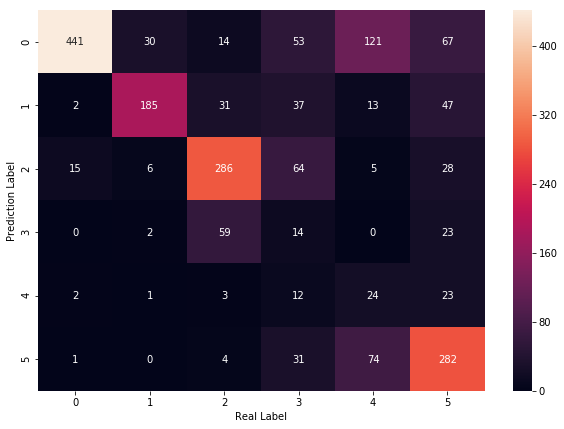

In [15]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [16]:
number_codes = [[0, 0, 0],
[0, 0, 1],
[0, 1, 0],
[1, 1, 1],
[1, 1, 0],
[1, 0, 1]]

In [17]:
matrix_errors = []

for i in range(5):
    for j in range(i+1,6):
        matrix_errors.append(3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.mean(matrix_errors)     

1.8

In [18]:
# 1.两类的类间距最大
# 2.两类的个数均衡
# 3.这个二分类器的准确度高 